In [ ]:
import pandas as pd

hotels = "C:\\Users\\meetm\\OneDrive\\Documents\\GitHub\\Airbnb-Prices\\Airbnb_site_hotel.csv" #path for csv



df = pd.read_csv(hotels) #read in the data

#Remove all rows with any missing values
df_cleaned = df.dropna()
print("Removed missing rows:", len(df) - len(df_cleaned))
print("Remaining rows:", len(df_cleaned))

Removed missing rows: 57612
Remaining rows: 28574


C:\Users\meetm\AppData\Local\Temp\ipykernel_13936\522978042.py:7: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(hotels) #read in the data


In [ ]:
#Convert comma based numeric columns to decimals
comma_cols = ['consumer', 'bathrooms', 'host response rate', 'host acceptance rate']

for col in comma_cols:
    df_cleaned[col] = (
        df_cleaned[col]
        .astype(str)
        .str.replace(",", ".", regex=False)
    )
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

#price to numeric
df_cleaned['price'] = pd.to_numeric(df_cleaned['price'], errors='coerce')

#Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()


C:\Users\meetm\AppData\Local\Temp\ipykernel_13936\2928661758.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = (
C:\Users\meetm\AppData\Local\Temp\ipykernel_13936\2928661758.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
C:\Users\meetm\AppData\Local\Temp\ipykernel_13936\2928661758.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [ ]:
#Encode area
area_map = {
    'North America': 1,
    'Europe': 2,
    'Asia': 3
}
df_cleaned['area'] = df_cleaned['area'].map(area_map)

#Encode cities
city_map = {
    'Toronto': 1, 'NewYork': 2, 'Amsterdam': 3, 'berlin': 4,
    'Dublin': 5, 'Hongkong': 6, 'Munich': 7, 'Singapore': 8,
    'sydney': 9, 'tokyo': 10, 'taipei': 11
}

df_cleaned['city'] = df_cleaned['city'].map(city_map)


In [14]:
#Scale selected numeric columns

from sklearn.preprocessing import StandardScaler

scale_cols = ['bathrooms', 'consumer', 'host response rate', 
              'host acceptance rate']

scaler = StandardScaler()
df_cleaned[scale_cols] = scaler.fit_transform(df_cleaned[scale_cols])

In [26]:
# remove unuseful non numerical columns
columns_to_remove = ['id', 'name', 'host_name', 'host_id']

for col in columns_to_remove:
    if col in df_cleaned.columns:
        df_cleaned = df_cleaned.drop(columns=[col])


In [27]:
#Split train/test for modeling
from sklearn.model_selection import train_test_split

X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (22859, 18)
Test set: (5715, 18)


In [28]:
# Save the cleaned dataset as a new CSV
output_path = "C:\\Users\\meetm\\OneDrive\\Documents\\GitHub\\Airbnb-Prices\\Airbnb_site_hotel_cleaned.csv"
df_cleaned.to_csv(output_path, index=False)

print("Cleaned dataset saved to:", output_path)


Cleaned dataset saved to: C:\Users\meetm\OneDrive\Documents\GitHub\Airbnb-Prices\Airbnb_site_hotel_cleaned.csv


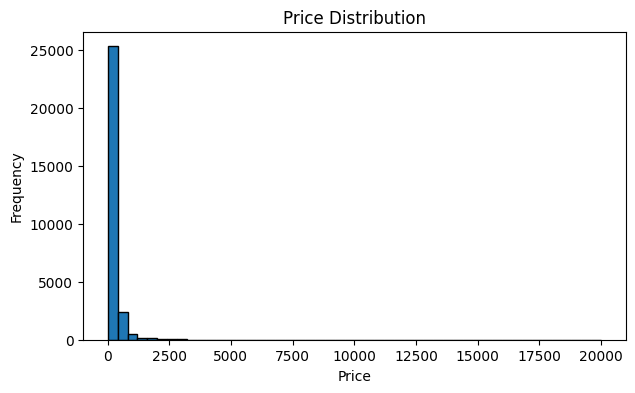

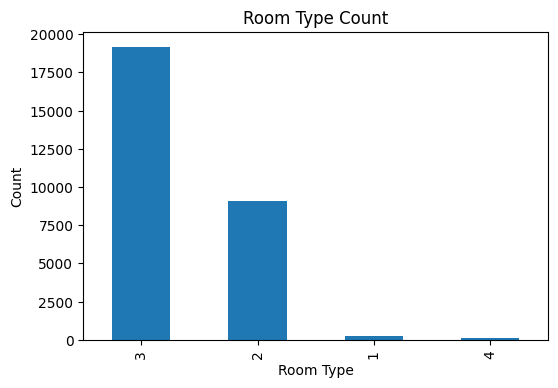

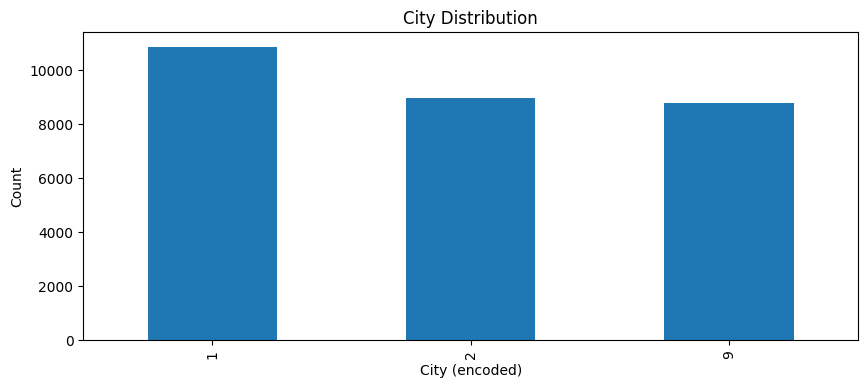

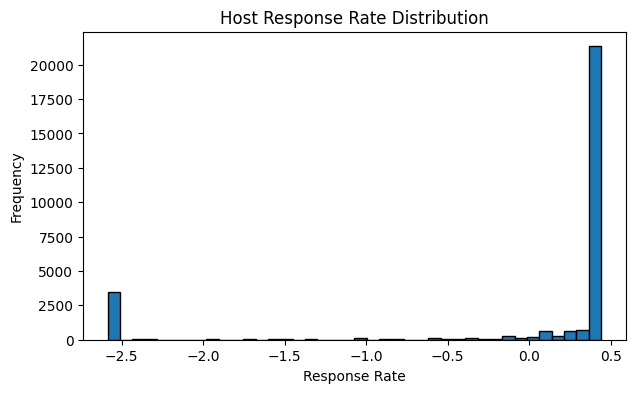

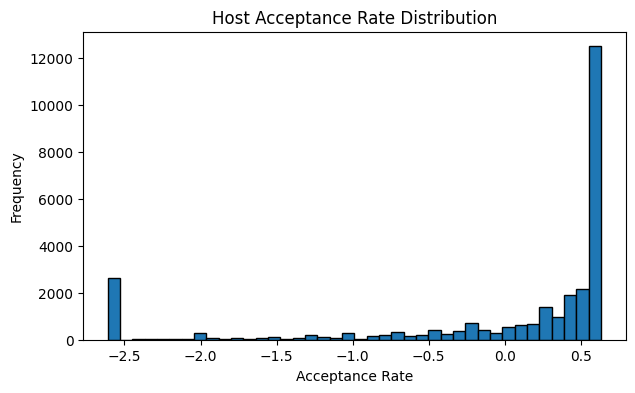

In [29]:
# Graphs
import matplotlib.pyplot as plt

# Price Distribution
plt.figure(figsize=(7,4))
plt.hist(df_cleaned['price'], bins=50, edgecolor='black')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Ratings Distribution
if 'rating' in df_cleaned.columns:
    plt.figure(figsize=(7,4))
    plt.hist(df_cleaned['rating'], bins=40, edgecolor='black')
    plt.title("Ratings Distribution")
    plt.xlabel("Rating")
    plt.ylabel("Frequency")
    plt.show()

# Reviews Distribution
if 'number_of_reviews' in df_cleaned.columns:
    plt.figure(figsize=(7,4))
    plt.hist(df_cleaned['number_of_reviews'], bins=50, edgecolor='black')
    plt.title("Number of Reviews Distribution")
    plt.xlabel("Reviews")
    plt.ylabel("Frequency")
    plt.show()

# Room Type Count
if 'room_type' in df_cleaned.columns:
    plt.figure(figsize=(6,4))
    df_cleaned['room_type'].value_counts().plot(kind='bar')
    plt.title("Room Type Count")
    plt.xlabel("Room Type")
    plt.ylabel("Count")
    plt.show()

# City Distribution 
plt.figure(figsize=(10,4))
df_cleaned['city'].value_counts().plot(kind='bar')
plt.title("City Distribution")
plt.xlabel("City (encoded)")
plt.ylabel("Count")
plt.show()

# Host Response Rate 
plt.figure(figsize=(7,4))
plt.hist(df_cleaned['host response rate'], bins=40, edgecolor='black')
plt.title("Host Response Rate Distribution")
plt.xlabel("Response Rate")
plt.ylabel("Frequency")
plt.show()

# Host Acceptance Rate
plt.figure(figsize=(7,4))
plt.hist(df_cleaned['host acceptance rate'], bins=40, edgecolor='black')
plt.title("Host Acceptance Rate Distribution")
plt.xlabel("Acceptance Rate")
plt.ylabel("Frequency")
plt.show()


Linear Regression MSE: 105096.55167159549


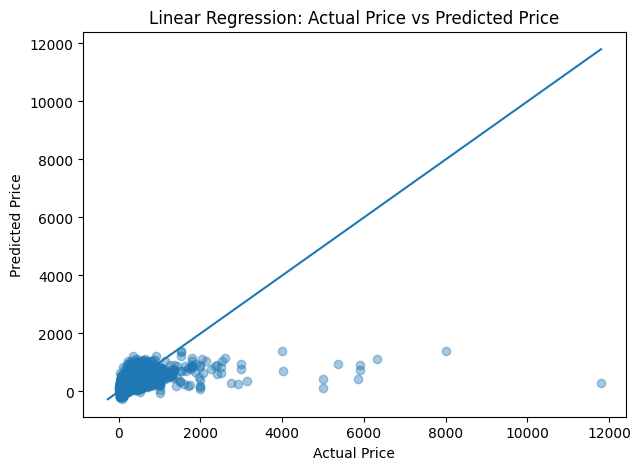

In [31]:
# Liner regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, pred_lr)

print("Linear Regression MSE:", mse_lr)


# Scatter plot of Actual vs Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, pred_lr, alpha=0.4)

plt.title("Linear Regression: Actual Price vs Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

min_val = min(min(y_test), min(pred_lr))
max_val = max(max(y_test), max(pred_lr))
plt.plot([min_val, max_val], [min_val, max_val])

plt.show()



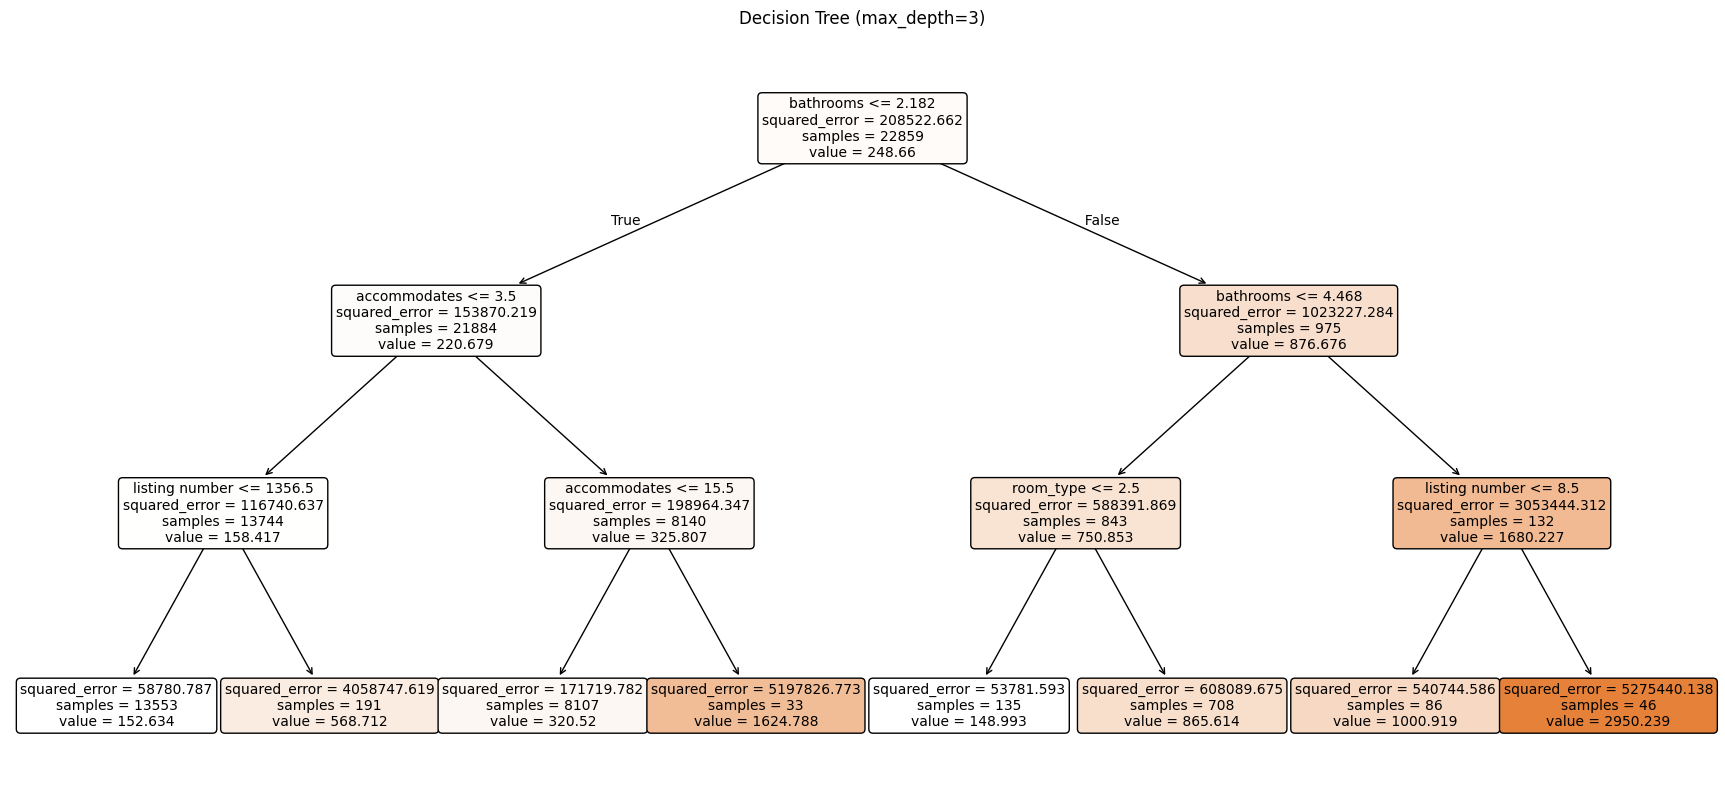

In [40]:
# Decision Tree
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

small_tree = DecisionTreeRegressor(
    max_depth=3,        
    random_state=42
)

small_tree.fit(X_train, y_train)

plt.figure(figsize=(22, 10))
tree.plot_tree(
    small_tree,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree (max_depth=3)")
plt.show()



Random Forest MSE: 86189.41861935801


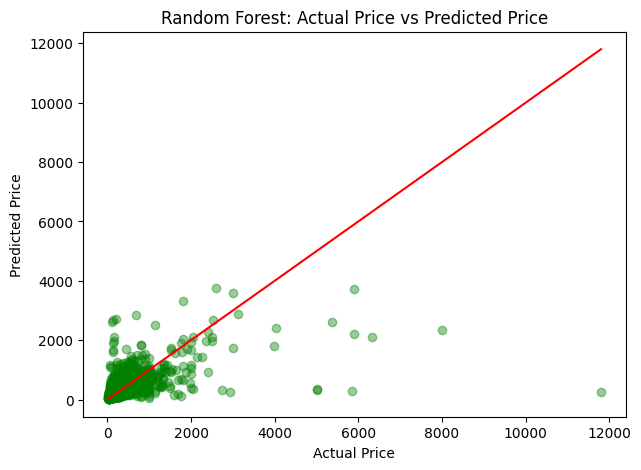

In [33]:
# Random forest regression model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, pred_rf)

print("Random Forest MSE:", mse_rf)




# Scatter plot of Actual vs Predicted for Random Forest
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, pred_rf, alpha=0.4, color='green')

plt.title("Random Forest: Actual Price vs Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

min_val = min(min(y_test), min(pred_rf))
max_val = max(max(y_test), max(pred_rf))
plt.plot([min_val, max_val], [min_val, max_val], color='red')

plt.show()



In [35]:
# Compare Model Performance
print("Linear Regression MSE:", mse_lr)
print("Random Forest MSE:", mse_rf)

if mse_rf < mse_lr:
    print("→ Random Forest performed better")
else:
    print("→ Linear Regression performed better")


Linear Regression MSE: 105096.55167159549
Random Forest MSE: 86189.41861935801
→ Random Forest performed better


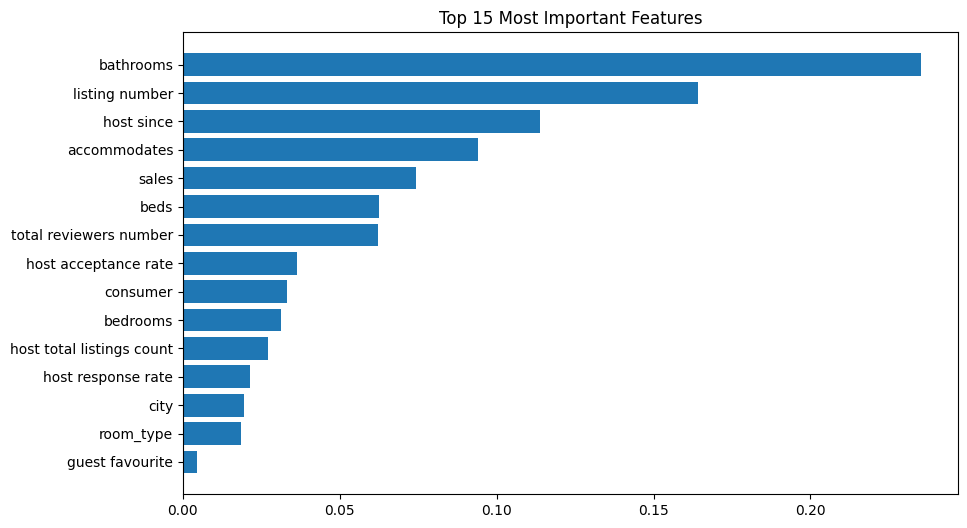

In [ ]:
# Key features
importances = pd.Series(rf.feature_importances_, index=X.columns)
top15 = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
plt.barh(top15.index, top15.values)
plt.title("Top 15 Most Important Features")
plt.gca().invert_yaxis()
plt.show()
